# Cluster Analysis

### What is Clustering ?

Clustering is a process of arranging data into groups of similar objects. Different grouping results are obtained from various clustering methods available to group the dataset. The choice of a particular method will depend on the desired output.

The clustering methods are:
1. Hierarchical Agglomerative methods
2. Partitioning Methods
3. The Single Link Method (SLINK)
4. The Complete Link Method (CLINK)
5. The Group Average Method


### Application of Cluster Analysis

1. Finding simmilarities between items with no categories
    - Categorizing text document
    - Counting object in image
    - Grouping image based on content
2. Finding new pattern in categorized data
    - Looking at unkown features
    - Finding correlated stocks and commodities (positive or negative)
3. Recommendation system
    - Finding related news
    - Finding product or information according to users taste

### Problem Statement

Banks sell credit cards to many customers but how many of those customers actually use it for a very long time ? How many of them make very high purchases on their credit card ?  How many people do not make their credit payments on or before the due-date ?  

This case develops a **customer segmentation** that will help marketing team decide it's next marketing strategy. 

### Dataset - Credit Card

The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

source : https://www.kaggle.com/arjunbhasin2013/ccdata

In [128]:
#Loading some helpful packages 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage  #to plot dendrograms & perform complete linkage


In [129]:
data = pd.read_csv('/users/Rachita/Desktop/Python/assignment/cluster/CC GENERAL.csv')

In [130]:
data.shape

(8950, 18)

In [131]:
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [132]:
data = data.drop(["CUST_ID"], axis=1)                     #dropping discreet variable CUST_ID

In [133]:
data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [134]:
#Checking for missing values
data.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE_FREQUENCY        0
dtype: int64

In [135]:
#Using mean imputaion for both Minimum_Payments and Credit_Limits
data.loc[(data['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data['MINIMUM_PAYMENTS'].mean()
data.loc[(data['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=data['CREDIT_LIMIT'].mean()

In [136]:
data.isnull().sum().sort_values(ascending=False).head()

TENURE                        0
ONEOFF_PURCHASES_FREQUENCY    0
BALANCE_FREQUENCY             0
PURCHASES                     0
ONEOFF_PURCHASES              0
dtype: int64

### Scaling the Data

In [137]:
data_scaled = data.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [138]:
data_scaled.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,2.292803e-15,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


## Hierarchichal Clustering

### Plotting a Dendrogram

#### Linkage in Hierarchical Clustering

**What is linkage ? What are it's 3 types of linkages ?**

Hierarchical clustering treats each data point as a single cluster and then successively merges the clusters until all points have been merged into a single remaining cluster. 

In **complete-link** (or complete linkage) hierarchical clustering, we merge in each step the two clusters whose merger has the smallest diameter (or: the two clusters with the smallest *maximum* pairwise distance).

In **single-link** (or single linkage) hierarchical clustering, we merge in each step the two clusters whose two closest members have the smallest distance (or: the two clusters with the smallest *minimum* pairwise distance).

In **average-link** (or group average) clustering, we compromise between the sensitivity of complete-link clustering to outliers and the tendency of single-link clustering to form long chains that do not correspond to the intuitive notion of clusters as compact, spherical objects.


In [139]:
#We will be using the complete linkage in our example
Z = linkage(data_scaled, 'complete')

A hierarchical clustering is often represented as a dendrogram.

A dendrogram is a visualization in form of a tree showing the order and distances of merges during the hierarchical clustering.

A dendrogram illustrates how each cluster is composed by drawing a U-shaped link between a non-singleton cluster and its children.  The top of the U-link indicates a cluster merge.  The two legs of the U-link indicate which clusters were merged.  The length of the two legs of the U-link represents the distance between the child clusters.  It is also the cophenetic distance between original observations in the two children clusters.

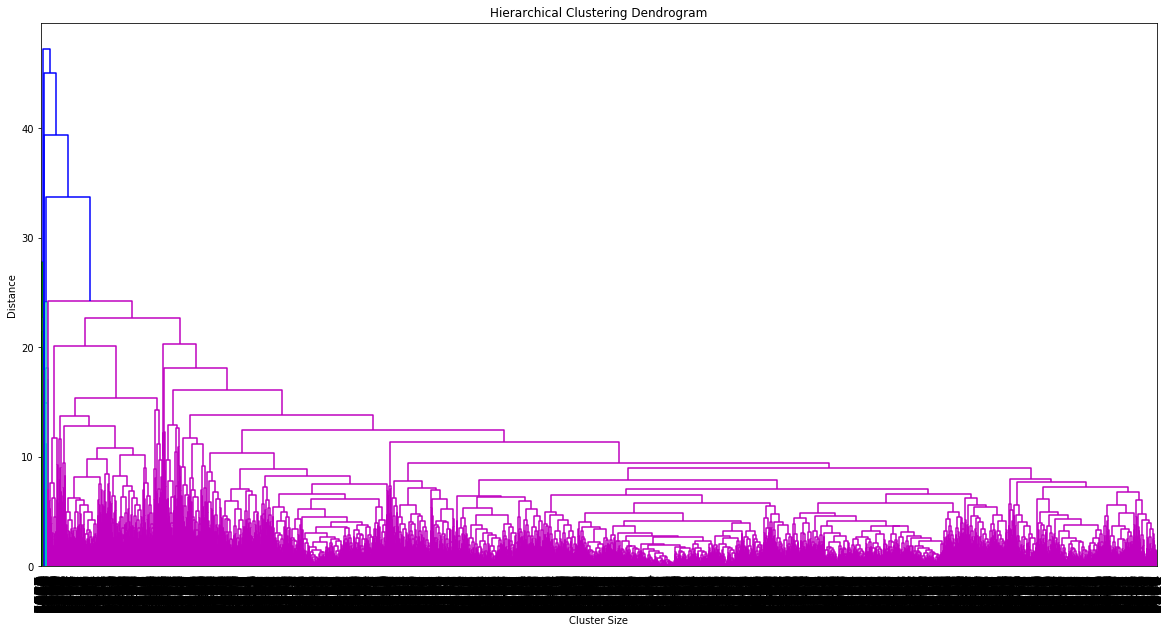

In [140]:
#Calculate the full dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,                        #rotates the x axis labels
    leaf_font_size=15.,                       #font size for the x axis labels
)
plt.show()


On the x-axis you see the cluster size and on the y-axis you see the distances (the distance between two newly formed clusters).
 
The horizontal lines are cluster merges. The height of the horizontal lines tell you about the distance that needed to be "bridged" to form the new cluster. The vertical lines tell you which clusters/labels were part of the merge, forming that new cluster. 

Interpretation of our example : 
You can see that from distances = 22 there's a big jump of the distance to the final merge at a distance of approximately 45.

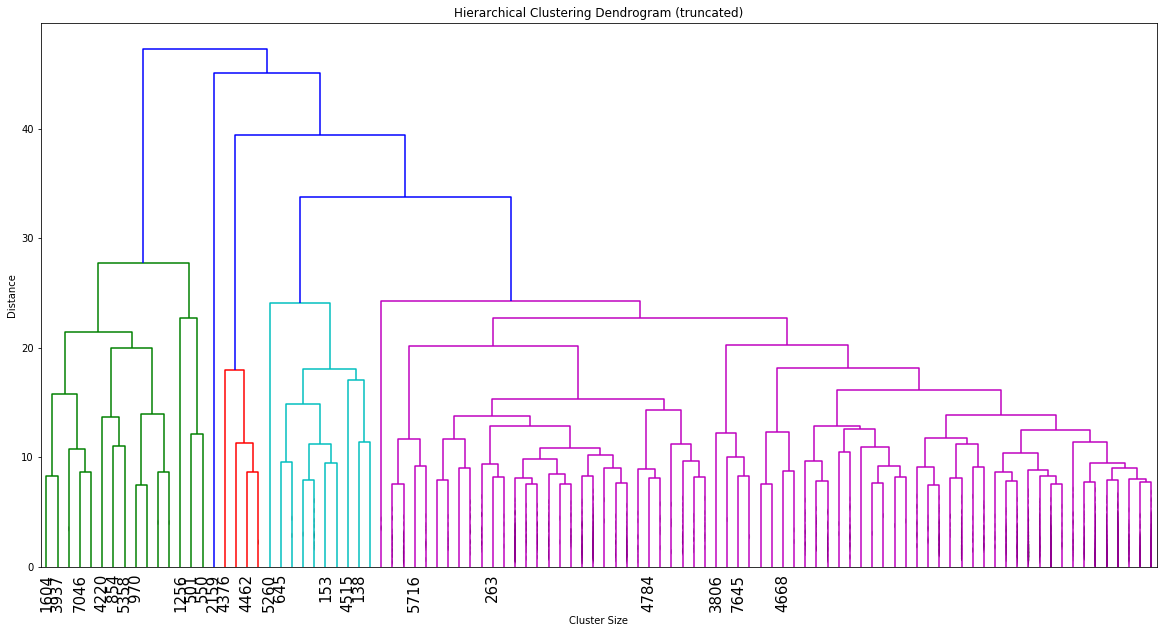

In [141]:
#The above shows a truncated dendrogram, which only shows the last p=100 out of total merges.
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',                       #show only the last p merged clusters
    p=100,                                       #show only the last p merged clusters
    show_leaf_counts=False,                      
    leaf_rotation=90.,
    leaf_font_size=15.,
    show_contracted=True,                        #to get a distribution impression in truncated branches
)
plt.show()


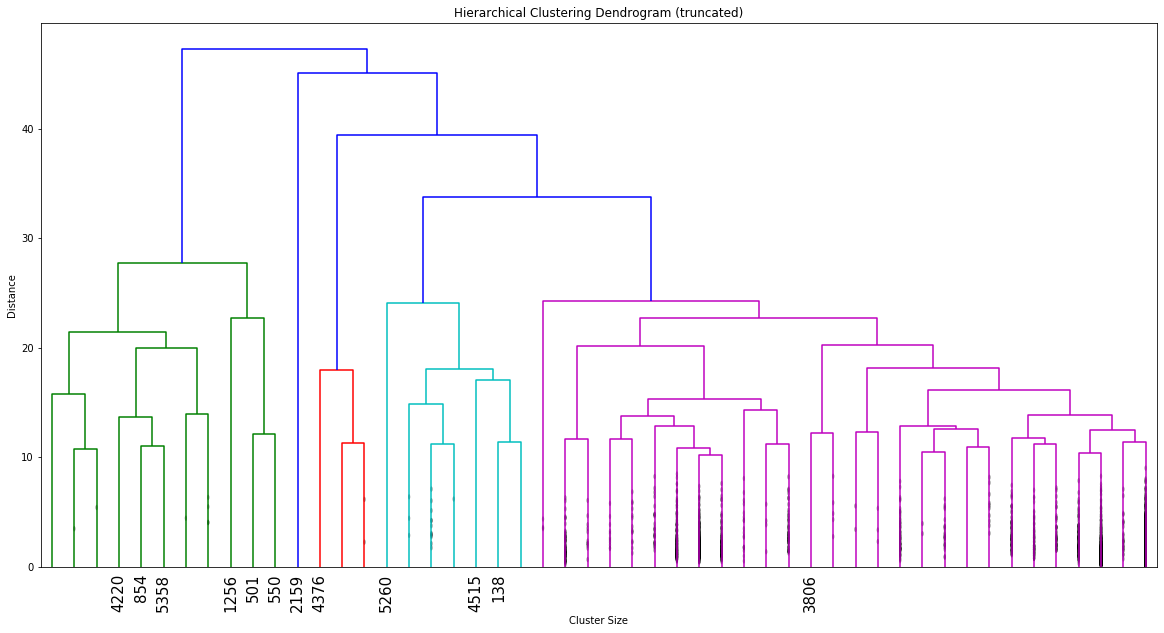

In [142]:
#The above shows a truncated dendrogram, which only shows the last 50 out of total merges.
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
dendrogram(Z,truncate_mode='lastp',p=50, show_leaf_counts=False,leaf_rotation=90.,leaf_font_size=15.,show_contracted=True)
plt.show()


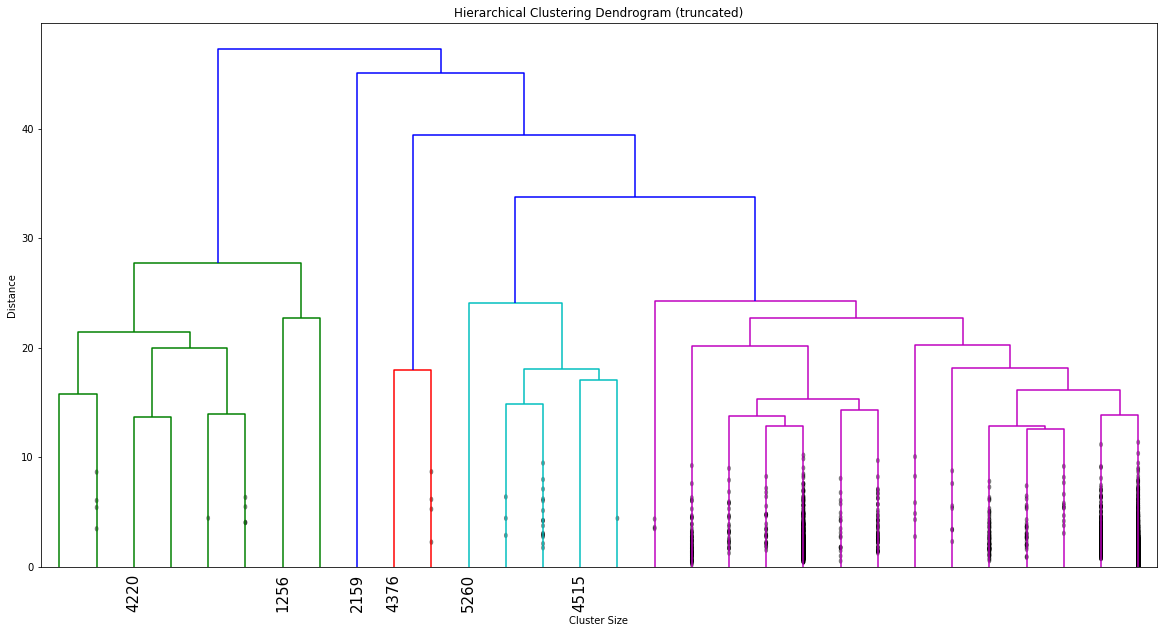

In [143]:
#The above shows a truncated dendrogram, which only shows the last 30 out of total merges.
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
dendrogram(Z,truncate_mode='lastp',p=30, show_leaf_counts=False,leaf_rotation=90.,leaf_font_size=15.,show_contracted=True)
plt.show()

We can conclude that without any information loss, we have achieved 5 different clusters.

## Agglomerative Hierarchical Clustering

In [144]:
import sklearn
from sklearn.cluster import AgglomerativeClustering

In [145]:
hclust = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')

In [146]:
hclust.fit(data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=5,
                        pooling_func='deprecated')

In [147]:
#Grouping the data
data['Groups'] = hclust.labels_

In [148]:
data.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Groups
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,1
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,1


In [149]:
#Checking the aggregate of the 5 groups
data.groupby(['Groups']).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Groups,,,,,,,,,,,,,,,,,
0,4812.382778,0.956126,27505.339565,22417.452174,5087.887391,1617.786145,0.905072,0.846377,0.708696,0.061594,2.608696,124.130435,16000.000000,28138.984873,2599.090939,0.533432,11.913043
1,1537.160978,0.876655,902.567513,529.952656,372.916997,971.396983,0.487890,0.199874,0.361739,0.135407,3.236842,13.984480,4436.361064,1633.408224,809.059188,0.152857,11.514395
2,10905.053810,1.000000,431.930000,133.500000,298.430000,47137.211760,0.583333,0.250000,0.500000,1.000000,123.000000,21.000000,19600.000000,39048.597620,5394.173671,0.000000,12.000000
3,6674.080781,1.000000,1714.498571,0.000000,1714.498571,1008.546231,0.571429,0.000000,0.571429,0.059524,2.285714,34.142857,6457.142857,2169.653661,52620.432990,0.000000,12.000000
4,6122.439548,0.976431,11407.285185,2749.650000,8657.635185,1178.828340,0.922840,0.555556,0.901235,0.098765,3.555556,155.111111,12755.555556,10590.323211,3962.146636,0.158409,12.000000


## K-means Clustering 

K-means clustering is a type of unsupervised learning, which is used with unlabeled dataset. The goal of this algorithm is to find K groups in the data. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

1) The centroids of the K clusters, which can be used to label new data. 

2) Labels for the training data (each data point is assigned to a single cluster)

K-means works by defining spherical clusters that are separable in a way so that the mean value converges towards the cluster center. Because of this, K-Means may underperform sometimes.

**Application of K-means algorithm :**

1)Document Classification
2)Delivery Store Optimization
3)Insurance Fraud Detection
4)Customer Segmentation

We will continue with our dataset i.e, the 4th application - Customer Segmentation of Credit Card holders

In [150]:
from sklearn.cluster import KMeans

In [151]:
km = KMeans(n_clusters=6,n_init=40)

In [152]:
#Fitting the kmeans model
km.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=40, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [153]:
#Cluster labels
km.labels_

array([4, 0, 5, ..., 2, 4, 4], dtype=int32)

In [154]:
#Within group SSE
km.inertia_

84850.98165827396

In [155]:
#Calculating the within group SSE for different cluster solutions
n_clusters=30
inertias = []
for k in range(1,n_clusters):
    km = KMeans(n_clusters=k,n_init=40)
    inertia = km.fit(data_scaled).inertia_
    inertias.append(inertia)

What is a scree plot ?
A Scree Plot is a simple line segment plot that shows the fraction of total variance in the data. It is a plot, in descending order of magnitude, of the eigenvalues of a correlation matrix. It helps us visualize the relative importance of the factors, a sharp drop in the plot signals that subsequent factors are ignorable.

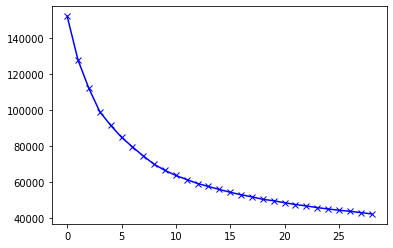

In [156]:
#Plotting the scree plot
plt.plot(inertias,'bx-')

In [157]:
kmean= KMeans(6)                #defining 6 clusters
kmean.fit(X)
labels=kmean.labels_

In [158]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Groups,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,4


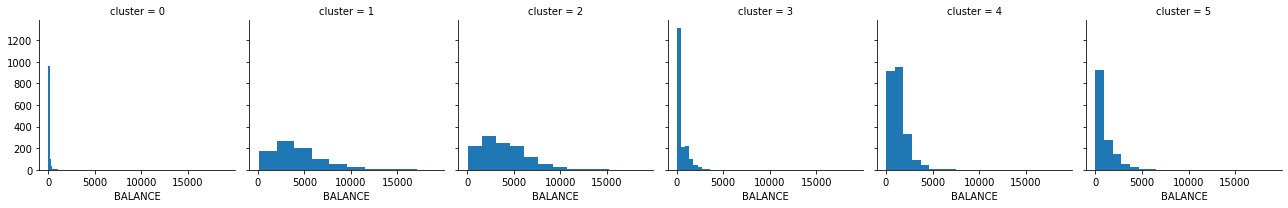

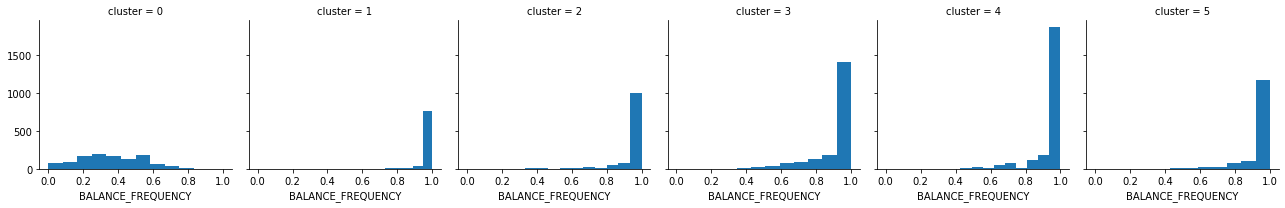

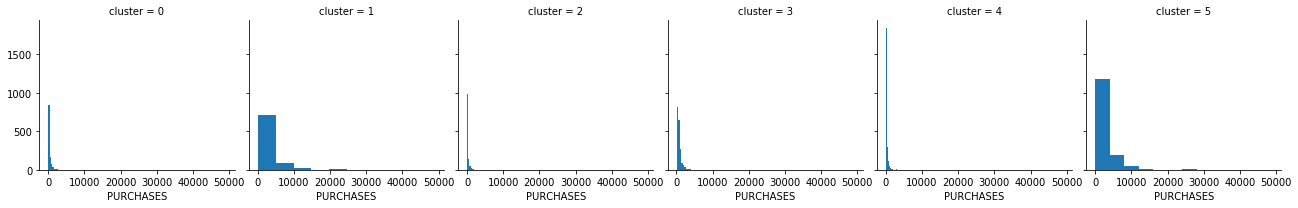

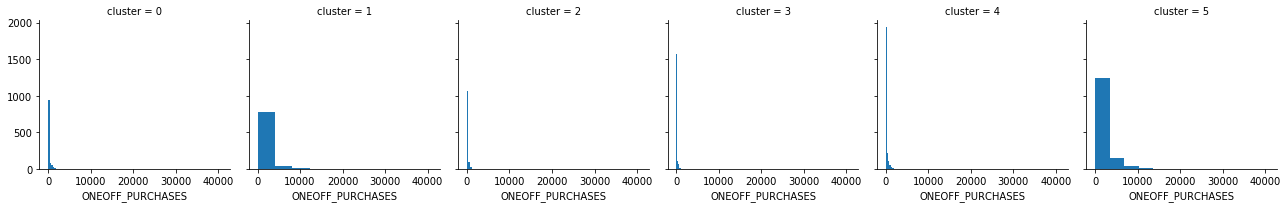

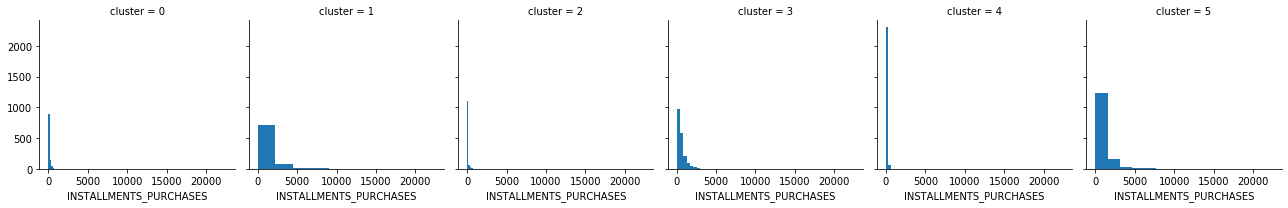

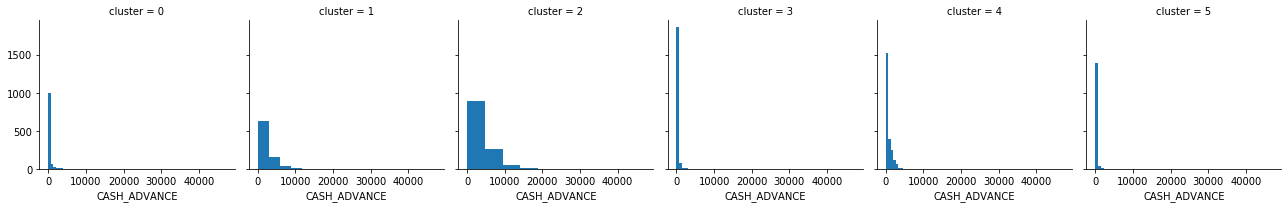

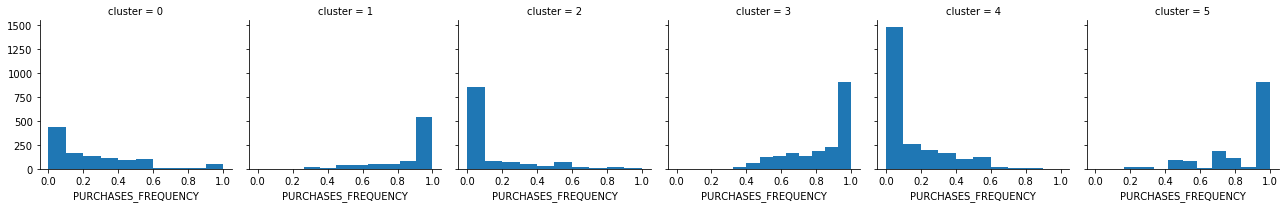

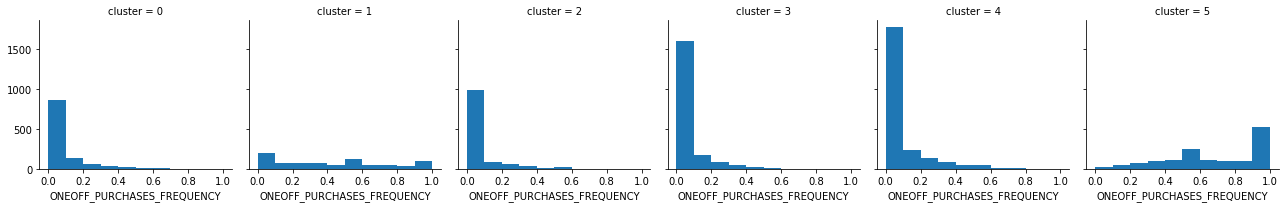

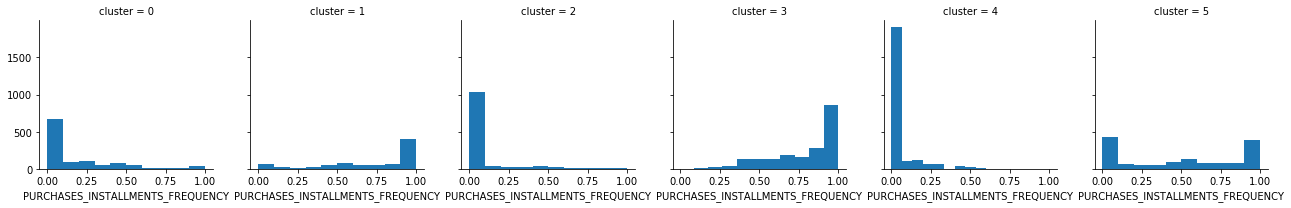

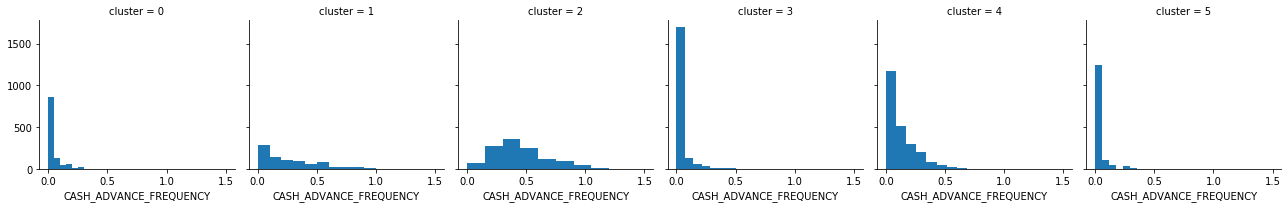

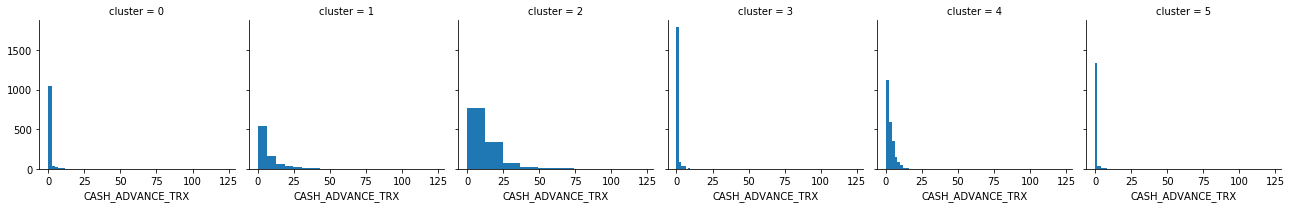

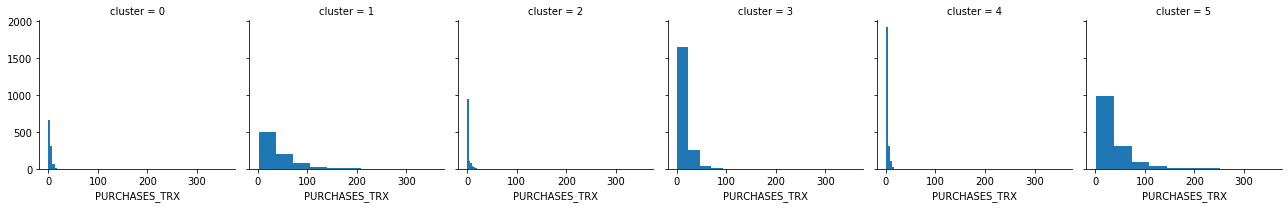

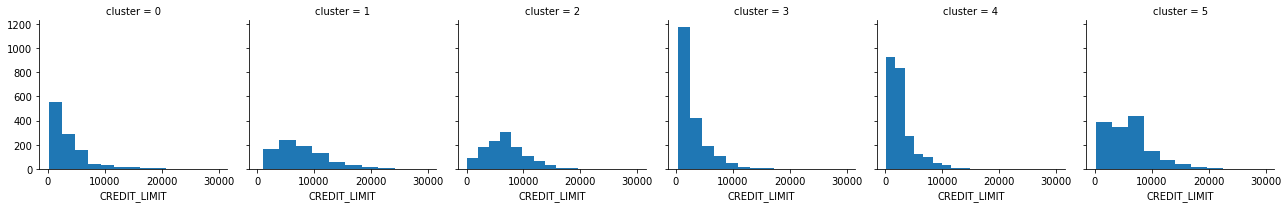

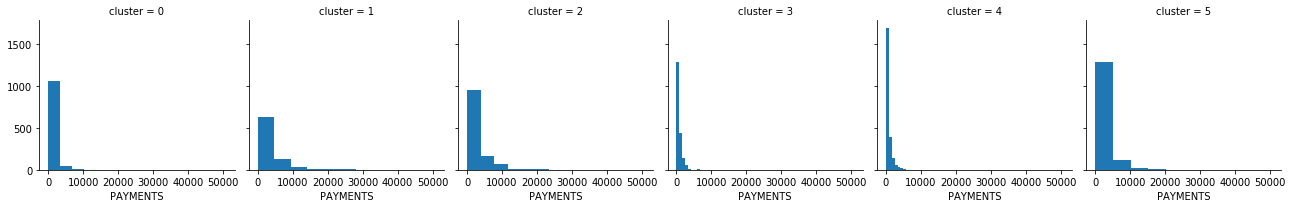

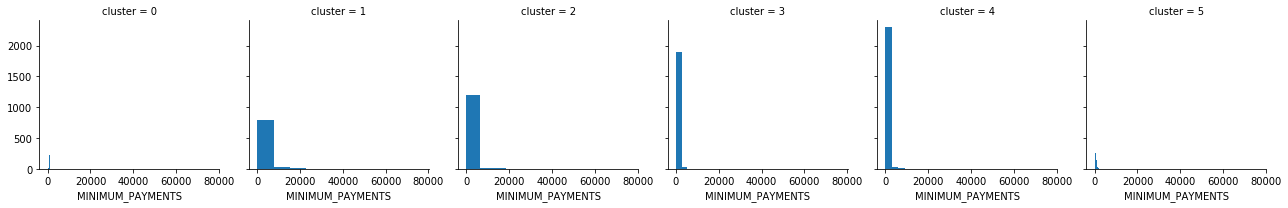

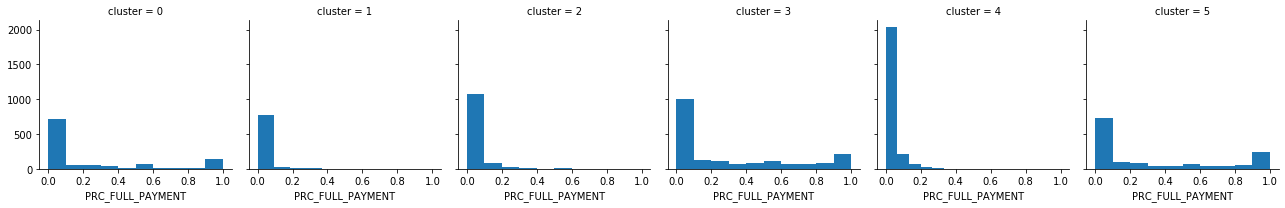

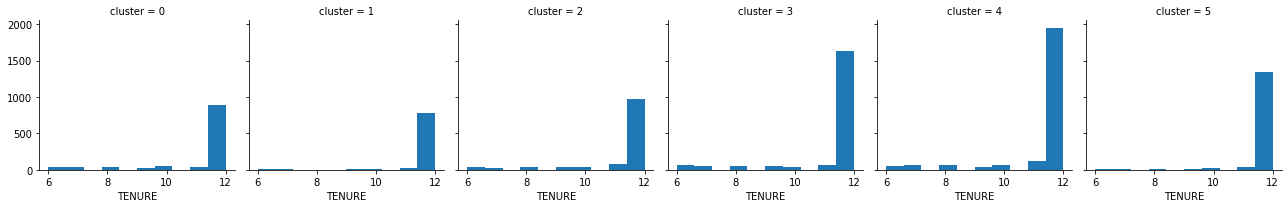

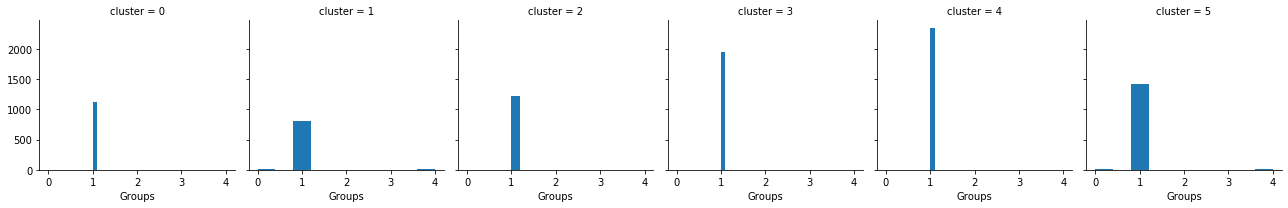

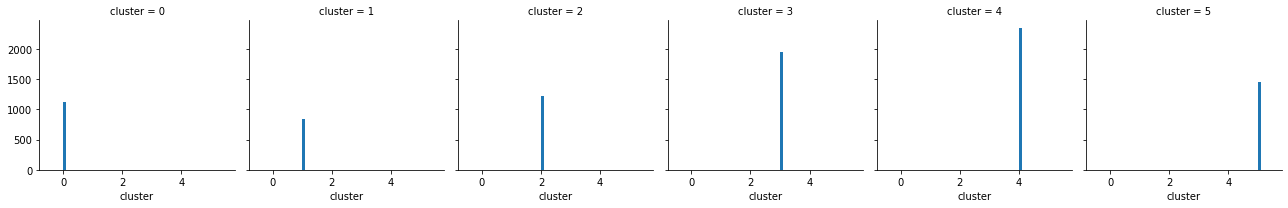

In [159]:
#Multi-plot grid for plotting conditional relationships
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

**Types of segments achieved :** 

Cluster 0 : People with average to high credit limit who make all type of purchases

Cluster 1 : This group has more people with due payments who take advance cash more often

Cluster 2 : Less money spenders with average to high credit limits who purchases mostly in installments

Cluster 3 : People with high credit limit who take more cash in advance

Cluster 4 : High spenders with high credit limit who make expensive purchases

Cluster 5 : People who don't spend much money and who have average to high credit limit

### Visualisation 

Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize.

We will be using this technique to plot our final 6 clusters.

In [160]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

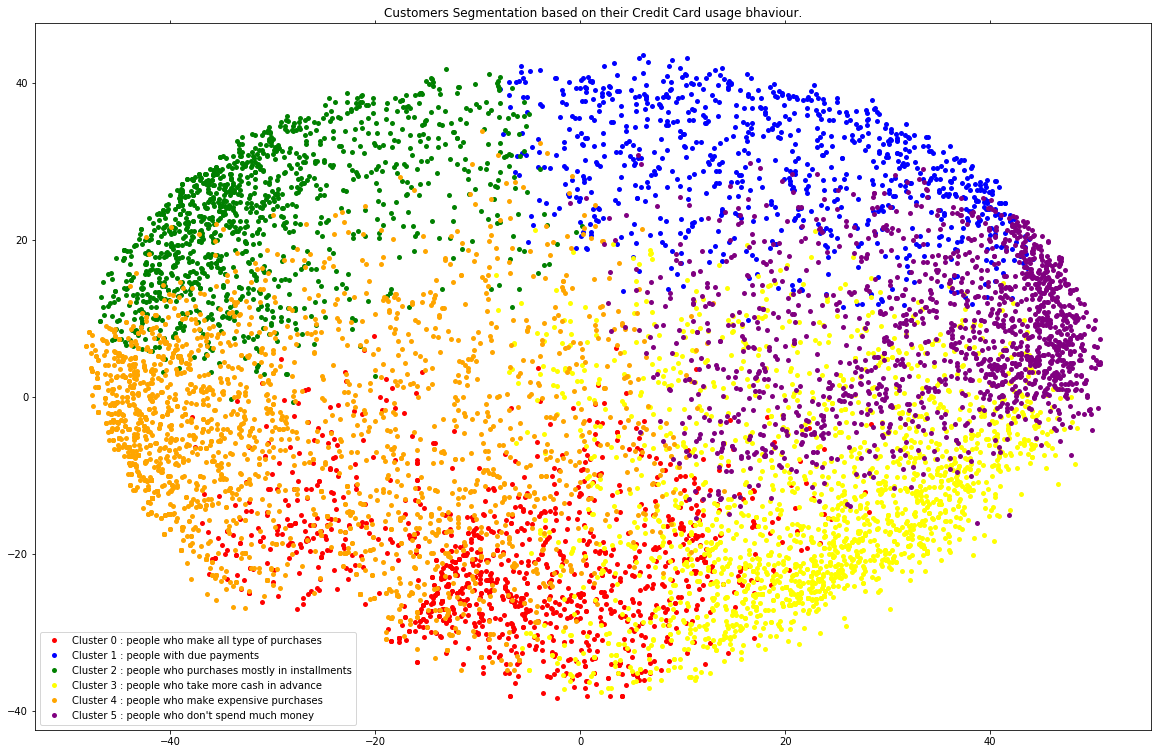

In [161]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple'}

names = {0: 'Cluster 0 : people who make all type of purchases', 
         1: 'Cluster 1 : people with due payments', 
         2: 'Cluster 2 : people who purchases mostly in installments', 
         3: 'Cluster 3 : people who take more cash in advance', 
         4: 'Cluster 4 : people who make expensive purchases',
         5: 'Cluster 5 : people who don\'t spend much money'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

### Conclusion :

We have studied the Clustering Analysis (Hierarchichal & K-means) and it's applications using Credit Card dataset.

The main objective of cluster analysis is that the within cluster variance should be low and between cluster variance should be high and we should select that many clusters which minimize the within cluster sum of squares. In our example that number of clusters was 6.